In [1]:
%matplotlib inline

from pathlib import Path

import collections
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Figure 19.1
가상 링크드인 네트워크. 멤버를 나타내는 노드와 그것들을 연결하는 선으로 구성 (무방향 그래프)

In [2]:
# Build a dataframe that defines the edges and use to build the graph
df = pd.DataFrame([
    ("Dave", "Jenny"), ("Peter", "Jenny"), ("John", "Jenny"),
    ("Dave", "Peter"), ("Dave", "John"), ("Peter", "Sam"),
    ("Sam", "Albert"), ("Peter", "John")
], columns=['from','to'])
df

,from,to
0,Dave,Jenny
1,Peter,Jenny
2,John,Jenny
3,Dave,Peter
4,Dave,John
5,Peter,Sam
6,Sam,Albert
7,Peter,John


In [3]:
G = nx.from_pandas_edgelist(df, 'from', 'to') 
# nx.from_pandas_edgelist(데이터프레임 이름, 노드를 나타낼 변수명, 노드를 나타낼 변수명)
G

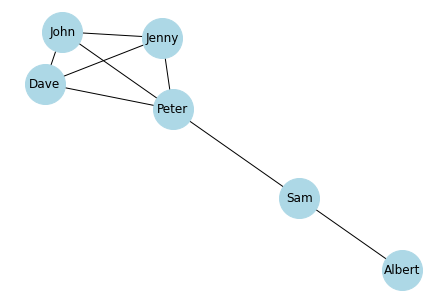

In [4]:
# Plot it
nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()

# Figure 19.2
방향 그래프. 화살표의 방향으로 누가 누구를 팔로우하는지 알 수 있음

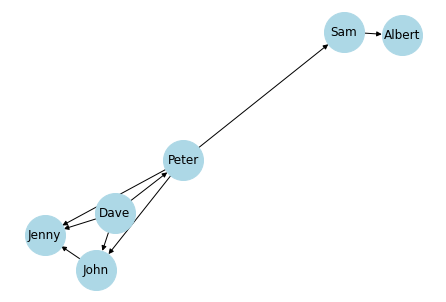

In [17]:
# generate and plot graph
# use nx.DiGraph to create a directed graph
G = nx.from_pandas_edgelist(df, 'from','to',create_using=nx.DiGraph()) # DiGraph = Direction Graph 인가?

nx.draw(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.show()

# Figure 19.5 
미국 텍사스 샌안토니오 내 마약 돈세탁 조직 네트워크

In [7]:
drug_df = pd.read_csv("drug.csv")
drug_df

,Entity,Related Entity,Relationship,Descrption,Related Entity Address 1,Related Entity Address 2,Related Address 3
0,6451 Babcock Road,Q & M LLC,Owner,Current Owner,10 Kings Heath,NaN,NaN
1,Q & M LLC,10 Kings Heath,Address,NaN,NaN,NaN,NaN
2,Maurico Sanchez,Q & M LLC,Managing Member,10 Kings Heath,11706 Mission Trace Street,NaN,NaN
3,Hilda Riebeling,Q & M LLC,Manager,10 Kings Heath,"1162 E Sonterra Boulevard, Suite 100",NaN,NaN
4,Ponte Vedra Apartments,Q & M LLC,Spinoff?,"8018 Broadway Street, Suite 200",NaN,NaN,NaN
5,"O S F STEAK HOUSE, LLC",Mauricio Sanchez,Historical Contact/Charter Officer,10223 Sahara Street,NaN,NaN,NaN
6,Arturo Madrigal,O S F STEAK HOUSE,Charter Officer,10223 Sahara Street,NaN,NaN,NaN
7,"HARBARD BAR, LLC",Arturo Madrigal,Charter Officer,NaN,NaN,NaN,NaN
8,10223 Sahara Street,O S F STEAK HOUSE,Address,NaN,NaN,NaN,NaN
9,"HARBARD BAR, LLC",Maurico Sanchez,Charter Officer,"9510 Tioga Drive, Suite 206",NaN,NaN,NaN


In [8]:
G = nx.from_pandas_edgelist(drug_df, 'Entity', 'Related Entity')

centrality = nx.eigenvector_centrality(G)  ## ⭐️⭐️⭐️
# 원점으로부터 노드에 대한 고유벡터같은데... 이게 노드의 중요성을 나타내는 가중치 역할을 하는 듯
# 근데 이게 어케 구하는거고 정확히 뭐인지 몰겠음 
centrality 

{'6451 Babcock Road': 0.05264378269433463,
 'Q & M LLC': 0.21854293795865204,
 '10 Kings Heath': 0.6232738847454137,
 'Maurico Sanchez': 0.0733987343826589,
 'Hilda Riebeling': 0.05264378269433463,
 'Ponte Vedra Apartments': 0.05264378269433463,
 'O S F STEAK HOUSE, LLC': 0.04091404143443774,
 'Mauricio Sanchez': 0.16984880237682895,
 'Arturo Madrigal': 0.2842650620056675,
 'O S F STEAK HOUSE': 0.07269589453582832,
 'HARBARD BAR, LLC': 0.08615812732354607,
 '10223 Sahara Street': 0.017512116179621624,
 '9510 Tioga Drive, Suite 206': 0.04091404143443774,
 'FDA FIBER, INC': 0.06847723025224997,
 'A G Q FULL SERVICE, LLC': 0.19777991353656008,
 'Alvaro Garcia de Quevedo': 0.19777991353656008,
 '19510 Gran Roble': 0.06847723025224997,
 'Lorenza Madrigal Cristan': 0.02478495609637187,
 '19519 Gran Roble': 0.006338716638883746,
 'Laredo National Bank': 0.0015270878166832099,
 'Ana Patrica Cristan de Madrigal': 0.09173509853193865,
 '6301 Melissa Ann Street': 0.05264378269433463,
 'CANTINA LA

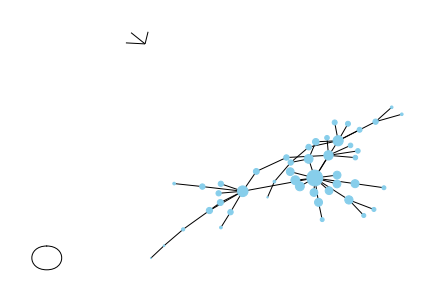

In [11]:
nx.draw(G, with_labels=False, node_color='skyblue', node_size=[400*centrality[n] for n in G.nodes()])
                                                    # 노드의 크기는 해당 네트워크 내에서의 중요성을 나타낸댔음.
plt.show()

# Figure 19.5
내용은 같지만 서로 다른 레이아웃의 링크드인 네트워크

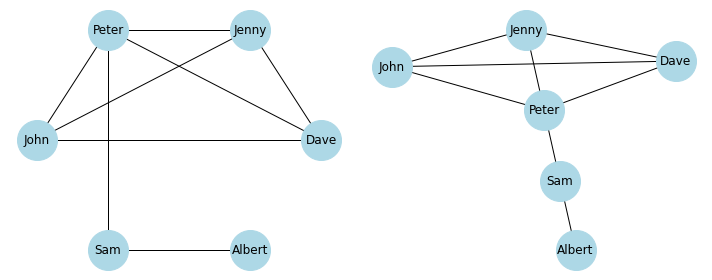

In [19]:
G = nx.from_pandas_edgelist(df, 'from', 'to')

plt.subplots(nrows=1, ncols=2, figsize=(10,4))

plt.subplot(121)
nx.draw_circular(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.subplot(122)
nx.draw_kamada_kawai(G, with_labels=True, node_color='lightblue', node_size=1600)
plt.tight_layout()
plt.show()

# nx 모듈의 그래프 그리는 메서드가 다양한가 봄.. nx.draw_circluar, nx.draw_kamada_kawai 등..

# Table 19.2
트위터 네트워크(그림 19.2)에 해당하는 인접행렬 일부

In [21]:
G = nx.from_pandas_edgelist(df, 'from', 'to', create_using=nx.DiGraph())
# nx.from_pandas_edgelist() : 링크드인 네트워크 폼으로 만들어주는 듯
print(nx.to_numpy_matrix(G)) # nx.to_numpy_matrix() : 링크드인 네트워크 폼을 인접행렬로 표현

matrix([[0., 1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 1., 1., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0.]])

Degree : 
[('Dave', 3), ('Jenny', 3), ('Peter', 4), ('John', 3), ('Sam', 2), ('Albert', 1)]

Centrality : 
{'Dave': 0.625, 'Jenny': 0.625, 'Peter': 0.8333333333333334, 'John': 0.625, 'Sam': 0.625, 'Albert': 0.4166666666666667}

Betweenness : 
{'Dave': 0.0, 'Jenny': 0.0, 'Peter': 6.0, 'John': 0.0, 'Sam': 4.0, 'Albert': 0.0}
{'Dave': 0.0, 'Jenny': 0.0, 'Peter': 0.6000000000000001, 'John': 0.0, 'Sam': 0.4, 'Albert': 0.0}

Eigenvector centrality : 
{'Dave': 0.47246979363344, 'Jenny': 0.47246979363344, 'Peter': 0.528716197637421, 'John': 0.47246979363344, 'Sam': 0.2105222549863287, 'Albert': 0.08035200571997278}


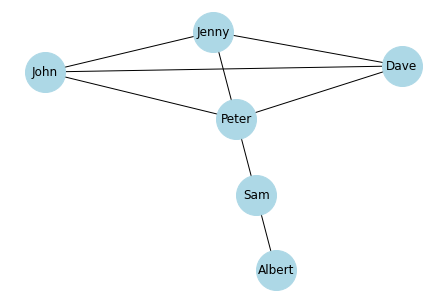

In [26]:
# 노드의 중요도 파악하는 네트워크 측도

G = nx.from_pandas_edgelist(df, 'from', 'to')
print('Degree : ')
print(G.degree()) # degree(연결도)
print()
print('Centrality : ') # In 번역판, 중심성. In 본판, (just)중심성
print(nx.closeness_centrality(G)) 
print()
print('Betweenness : ') # betweenness(중계성)
print(nx.betweenness_centrality(G, normalized=False))
print(nx.betweenness_centrality(G))
print()
print('Eigenvector centrality : ') # centrality(고유벡터 중심성)
print(nx.eigenvector_centrality(G, tol=1e-2))
v = nx.eigenvector_centrality(G, tol=1e-2).values()

nx.draw_kamada_kawai(G, with_labels=True, node_color='lightblue', node_size=1600)

In [27]:
print(nx.betweenness_centrality(G))
print(nx.current_flow_betweenness_centrality(G))
# betwenness centrality도 마찬가지로, 전류 모형을 적용하여, 
# graph에서 정보가 흐를 때, 각 node를 얼마나 지나가는지를 측정한, current flow betweenness centrality라는 것이 있습니다.

{'Dave': 0.0, 'Jenny': 0.0, 'Peter': 0.6000000000000001, 'John': 0.0, 'Sam': 0.4, 'Albert': 0.0}
{'Dave': 0.175, 'Jenny': 0.175, 'Peter': 0.675, 'John': 0.175, 'Sam': 0.4, 'Albert': 0.0}


# Figure 19.6
링크드인 그래프(그림 19.1)에서 피터 노드에 대한 연결도가 1과 2인 자기중심 네트워크

['Dave', 'Jenny', 'Peter', 'John', 'Sam', 'Albert']


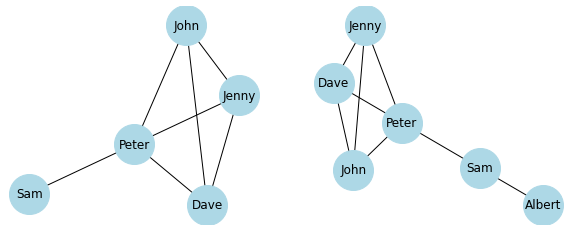

In [28]:
print(G.nodes)

plt.subplots(nrows=1, ncols=2, figsize=(10,4))

plt.subplot(121)
G_ego = nx.ego_graph(G, 'Peter') # nx.ego_graph(network, 중심으로 할 노드) : 자기중심 네트워크 형성
nx.draw(G_ego, with_labels=True, node_color='lightblue',node_size=1600)
plt.subplot(122)
G_ego = nx.ego_graph(G, 'Peter', radius=2)
# radius : Include all neighbors of distance<=radius from n.
#          (지정한 raduis보다 작은 거리에 있는 모든 이웃들의 수)
#          (연결도가 아닌 거 같은데 이건..??)
nx.draw(G_ego, with_labels=True, node_color='lightblue',node_size=1600)

# Table 19.5
연결도 분포(Degree Distribution)

In [32]:
G.degree()

DegreeView({'Dave': 3, 'Jenny': 3, 'Peter': 4, 'John': 3, 'Sam': 2, 'Albert': 1})

In [29]:
degreeCount = collections.Counter(d for node, d in G.degree())
# 각 노드에 대한 degree를 딕셔너리(?)형태로 나타내는 G.degree()에서 
# collections.Counter()(=쉽게말하면 count해주는 함수)을 이용해서 각 degree마다의 개수를 셈
# collections.Counter() 참고 : https://www.daleseo.com/python-collections-counter/
degreeCount

Counter({3: 3, 4: 1, 2: 1, 1: 1})

In [33]:
degreeDistribution = [0] * (1 + max(degreeCount))
degreeDistribution

[0, 0, 0, 0, 0]

In [35]:
for degree, count in degreeCount.items():
    degreeDistribution[degree] = count
degreeDistribution

[0, 1, 1, 3, 1]

In [36]:
# density(밀도) : 노드 간 총 연결 가능한 선 중 실제 연결된 선의 개수 (비율)
nx.density(G)

0.5333333333333333

In [ ]:
[d/sum(degreeDistribution) for d in degreeDistribution] # degree분포를 normalized해서 비율형태로 나타냄

# Figure 19.11
Twitter interface in Python

In [49]:
# 아래 패키지와 코드로 api사용하도록 하는 승인코드를 받기 위해선 트위터 사이트에 가서 개발자 자격으로 등록을 해야 함 !!!
# 참고 : https://gdbs.tistory.com/466


import os
from twython import Twython # 트위터에 연결할 수 있는 패키지

credentials = {}
credentials['CONSUMER_KEY'] = os.environ.get('TWITTER_CONSUMER_KEY', None)
# os.environ.get() = 환경변수 얻는 함수
# 환경변수 : 소프트웨어 개발에서 환경 변수(environment variable)는 
         # 일반적으로 운영 체제(operating system) 차원에서 설정해주는 변수를 의미하는데요. 
# os.environ 속성은 마치 파이썬 내장 자료 구조인 사전(dictionary)을 사용하듯이 사용할 수 있습니다.
# 참고 : https://www.daleseo.com/python-os-environ/
credentials['CONSUMER_SECRET'] = os.environ.get('TWITTER_CONSUMER_SECRET', None)
credentials

{'CONSUMER_KEY': None, 'CONSUMER_SECRET': None}

In [52]:
if not (credentials['CONSUMER_KEY'] is None and credentials['CONSUMER_SECRET'] is None):
    python_tweets = Twython(credentials['CONSUMER_KEY'], credentials['CONSUMER_SECRET'])
    
    # Create our query
    query = {'q':'love', 'result_type':'recent', 
            'count':25, 'lang':'en'}
    # "text mining"이란 단어를 포함하고 있는  "25"개의 "최근"의 "영문"트윗을 수집하는 코드
    
    recentTweets = python_tweets.search(**query)
    for tweet in recentTweets['statuses'][:2]:
        print(tweet['text'])